## Clustering

Objetivo: Agrupamento de tweets usando Clustering

Dataset: https://www.kaggle.com/datasets/kazanova/sentiment140

Columns:
- sentiment: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY.
- user: the user that tweeted (robotickilldozr)
- text: the text of the tweet (Lyx is cool)

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import calendar

In [118]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
df = pd.read_csv('twitter.csv', encoding='latin', header=None, names=["sentiment", "id", "date", "flag", "user", "text"])
df.head()

,sentiment,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [34]:
df.shape

(1600000, 6)

In [35]:
df.describe()

,sentiment,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


## Usuario:

In [36]:
df.user.nunique()

659775

In [37]:
df.user.value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
67trinity            1
Sibby                1
mAnyA_15             1
49ersfan111          1
bpbabe               1
Name: user, Length: 659775, dtype: int64

## Sentimento:

In [38]:
df.sentiment = df.sentiment.map({0: 'negative', 4: 'positive'})

negative    800000
positive    800000
Name: sentiment, dtype: int64

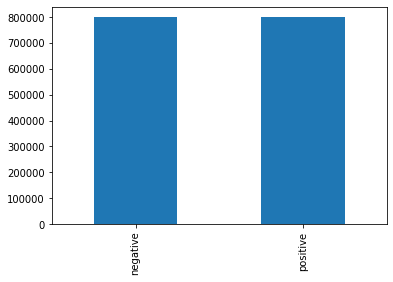

In [39]:
val_count = df.sentiment.value_counts()
val_count.plot(kind='bar')
val_count

## Data:

In [40]:
df.date = pd.to_datetime(df.date)# maybe: .tz_localize("PDT")
df.date.head()

c:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


0   2009-04-06 22:19:45
1   2009-04-06 22:19:49
2   2009-04-06 22:19:53
3   2009-04-06 22:19:57
4   2009-04-06 22:19:57
Name: date, dtype: datetime64[ns]

In [41]:
year = df.date.dt.year.unique()
year

array([2009], dtype=int64)

In [42]:
months = df.date.dt.month.unique()
months

array([4, 5, 6], dtype=int64)

In [43]:
map_month = {4:"April", 5:"May", 6:"June"}
map_weekday = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}

date
April    100025
May      576367
June     923608
Name: text, dtype: int64

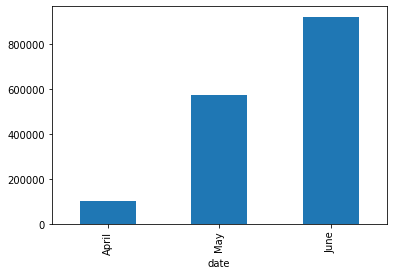

In [44]:
# Quantidade de Tweets por mes
tweets_por_mes = df.groupby(df.date.dt.month).text.count().rename(map_month)
tweets_por_mes.plot(kind='bar')
tweets_por_mes

In [45]:
def number_of_days_in_month(year: int, month: int) -> int:
    return calendar.monthrange(year, month)[1]

date
April     3334.166667
May      18592.483871
June     30786.933333
Name: text, dtype: float64

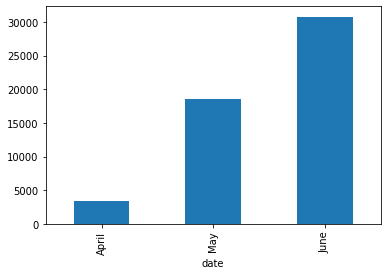

In [46]:
# Media de Tweets por dia
media_tweets_por_dia = tweets_por_mes / [number_of_days_in_month(year[0], month) for month in months]
media_tweets_por_dia.plot(kind='bar')
media_tweets_por_dia

sentiment,negative,positive
date,,
April,41607,58418
May,224822,351545
June,533571,390037


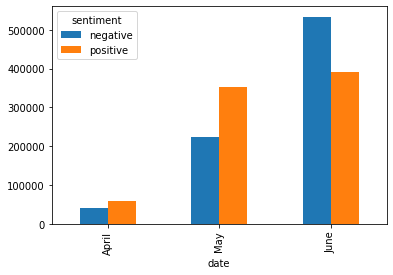

In [47]:
# Sentimento por Mes
sentimento_por_mes = df.groupby(df.date.dt.month).sentiment.value_counts().unstack(level=0).T.rename(map_month)
sentimento_por_mes.plot(kind='bar')
sentimento_por_mes

<AxesSubplot:xlabel='date'>

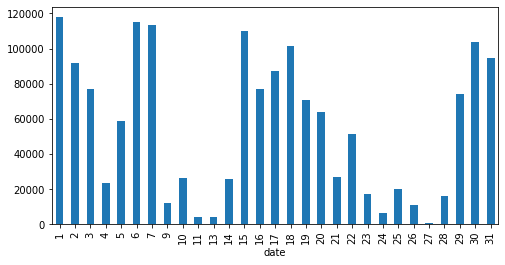

In [48]:
# Quantidade de Tweets por dia
tweets_por_dia = df.groupby(df.date.dt.day).text.count()
tweets_por_dia.plot(kind='bar',figsize=(8, 4))

<AxesSubplot:xlabel='date'>

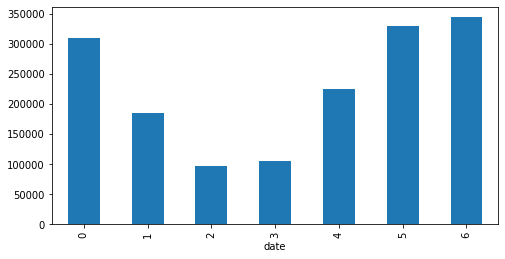

In [49]:
# Quantidade de Tweets por Dia da Semana
tweets_por_dia_da_semana = df.groupby(df.date.dt.weekday).text.count()
tweets_por_dia_da_semana.plot(kind='bar',figsize=(8, 4))

In [50]:
map_month.values()

dict_values(['April', 'May', 'June'])

<AxesSubplot:xlabel='date'>

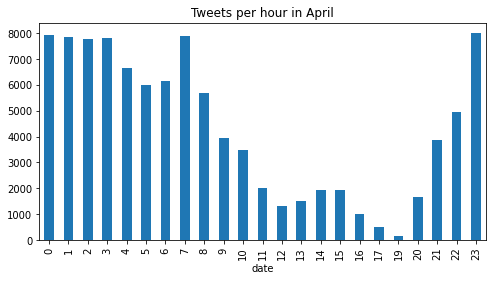

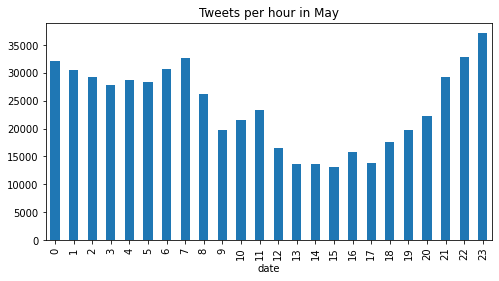

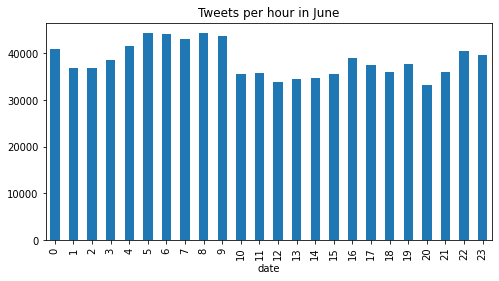

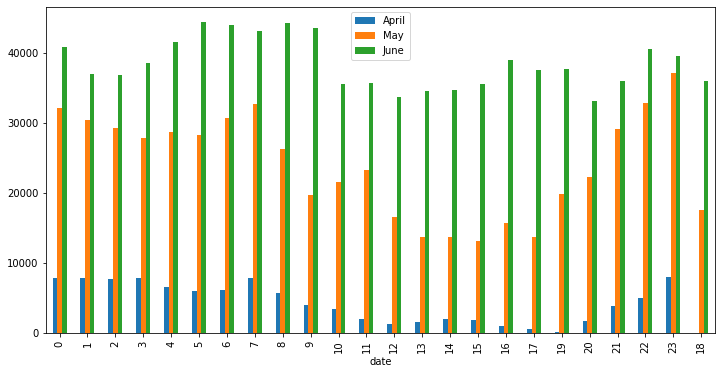

In [51]:
# Quantidade de Tweets por hora
lst = []
for month in months:
    tweets_por_hora = df[df.date.dt.month == month].groupby(df.date.dt.hour).text.count()
    plt.figure(figsize=(8, 4))
    plt.title(f"Tweets per hour in {map_month[month]}")
    tweets_por_hora.plot(kind='bar')
    lst.append(tweets_por_hora)
pd.concat(lst, axis=1, keys=map_month.values()).plot(kind='bar', figsize=(12, 6))

<AxesSubplot:xlabel='hour', ylabel='weekday'>

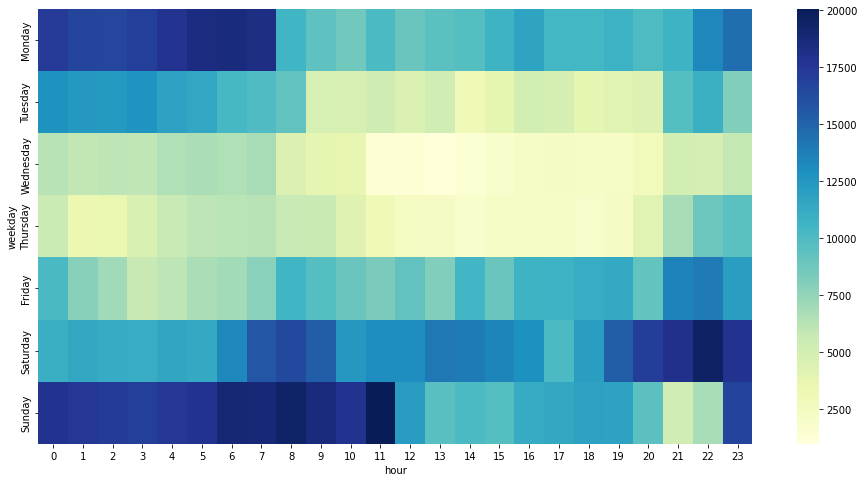

In [52]:
# Heatmap de Tweets
temp_df = df[["date", "text"]].copy()
temp_df["weekday"] = temp_df.date.dt.dayofweek
temp_df["hour"] = temp_df.date.dt.hour
tweets_dia_da_semana_por_hora = temp_df.groupby("weekday").hour.value_counts().unstack(level=0).T

plt.figure(figsize=(16,8))
sns.heatmap(tweets_dia_da_semana_por_hora, yticklabels=map_weekday.values(), cmap="YlGnBu")

## Limpeza dos Tweets com Nltk (Preprocessing)

In [53]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [54]:
df.text.str.lower()

0          @switchfoot http://twitpic.com/2y1zl - awww, t...
1          is upset that he can't update his facebook by ...
2          @kenichan i dived many times for the ball. man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    just woke up. having no school is the best fee...
1599996    thewdb.com - very cool to hear old walt interv...
1599997    are you ready for your mojo makeover? ask me f...
1599998    happy 38th birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, Length: 1600000, dtype: object

In [55]:
stemmer = SnowballStemmer("english", ignore_stopwords=True)
sw = stopwords.words("english")
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [123]:
def preprocess_text(s: pd.Series, t: int = 0) -> pd.Series:
    """
    Args:
        s: pd.Series
        t: int (0 = stemming, 1 = lemmatization) (default: 0)
    Returns:
        pd.Series
    """
    # remove characteres especiais, link, @s, etc.
    s = s.str.replace("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", " ", regex=True).str.lower()
    if t: # lemmatization
        pass
    else: # stemming
        f = stemmer.stem
    # remove stopwords e aplica a funcao(stemmer or lemmatization) na palavra
    return s.apply(lambda text: " ".join([f(word) for word in word_tokenize(text) if word not in sw]).strip()) 

In [124]:
text = preprocess_text(df.text)
text.head()

0         awww bummer shoulda got david carr third day
1    upset updat facebook text might cri result sch...
2      dive mani time ball manag save 50 rest go bound
3                      whole bodi feel itchi like fire
4                                        behav mad see
Name: text, dtype: object

## Word Encoding com TF-IDF Vectorization

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [126]:
tfidf_vectorizer = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf = tfidf_vectorizer.fit_transform(text)
tfidf.shape

<1600000x8000 sparse matrix of type '<class 'numpy.float64'>'
	with 8890096 stored elements in Compressed Sparse Row format>

## Implementando KMeans

In [127]:
from sklearn.cluster import KMeans

In [131]:
# busca a inertia para cada k
def calcular_wcss(data, max_k: int = 10) -> tuple[range, list[float]]:
    wcss = []
    for k in (r := range(1, max_k)):
        wcss.append(KMeans(n_clusters=k).fit(X=data).inertia_)
    return r, wcss

In [132]:
def numero_clusters(wcss: list[float]) -> int:
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distancias = []
    for x0,y0 in enumerate(wcss, start=2):
        numerador = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominador = ((y2 - y1)**2 + (x2 - x1)**2)**.5
        distancias.append(numerador/denominador)
    
    return distancias.index(max(distancias)) + 2

In [ ]:
r, inertia_k = calcular_wcss(tfidf)

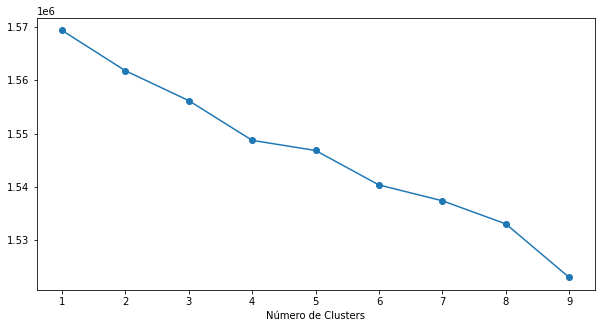

In [133]:
plt.figure(figsize=(10, 5))
plt.plot(r, inertia_k, marker='o')
plt.xlabel("Número de Clusters")
plt.show()

In [134]:
# Quantidade Ideal de Clusters
k = numero_clusters(inertia_k)
k

10

In [135]:
clusters = KMeans(n_clusters=k, random_state=40).fit_predict(tfidf)
clusters.shape

(1600000,)

In [136]:
max_items = np.random.choice(range(tfidf.shape[0]), size=20_000, replace=False) # sample 20_000 samples
max_items.shape

(10000,)

In [142]:
data = tfidf[max_items,:].todense()

## Top Keywords baseado no Tfidf

In [ ]:
pd.DataFrame(data).groupby(clusters[max_items]).mean()

In [ ]:
n_terms = 10
top_words = pd.DataFrame(data).groupby(clusters[max_items]).aggregate(['mean','count']) # agrupa os vetores TF-IDF por cluster
top_words['words'] = top_words.apply(lambda row: ','.join([terms[t] for t in np.argsort(row)[-n_terms:]]))
terms = tfidf_vectorizer.get_feature_names_out() # tf-idf terms
top_words

## Plotting Clusters

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [146]:
tfidf.shape

(1600000, 8000)

In [147]:
# PCA - Principal Component Analysis
pca = PCA(n_components=2).fit_transform(data)
pca.shape

(10000, 2)

Text(0.5, 1.0, 'PCA Cluster Plot')

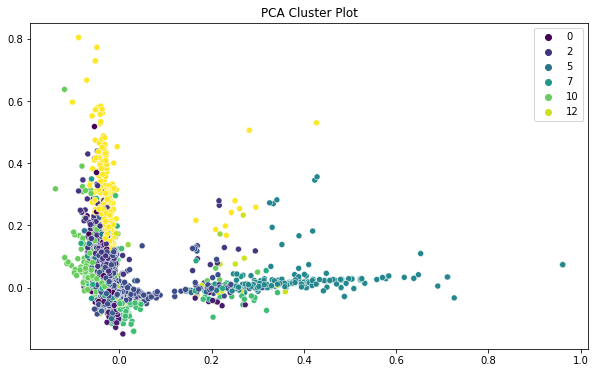

In [148]:
plt.figure(figsize=(10, 6))
sns.scatterplot(pca[:, 0], pca[:, 1], hue=clusters[max_items], palette="viridis")
plt.title('PCA Cluster Plot')

In [149]:
# TSNE - t-Distributed Stochastic Neighbor Embedding
tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data))

Text(0.5, 1.0, 'TSNE Cluster Plot')

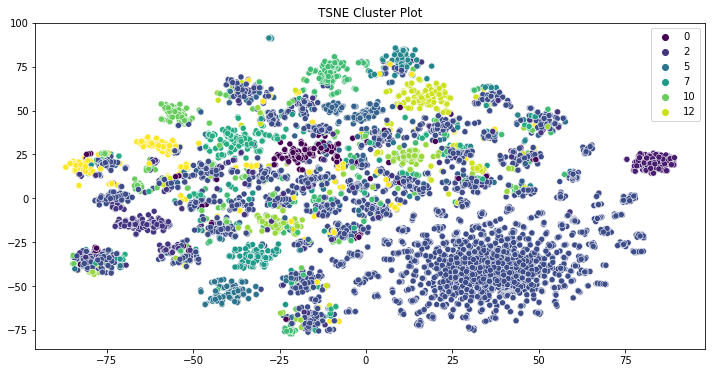

In [150]:
plt.figure(figsize=(12, 6))
sns.scatterplot(tsne[:, 0], tsne[:, 1], hue=clusters[max_items], palette="viridis")
plt.title('TSNE Cluster Plot')

## O que fazer para melhorar
- Utilizar o resultado todo ao inves de somente 10_000 samples
- Fazer mais clusters
### Testar com:
- Word embedding ao inves de tfidf
- Lemmatization ao inves de stemming
- Algorithms de reducao de dimensionalidade diferentes de PCA e TSNE
- Modelo diferente de Kmeans